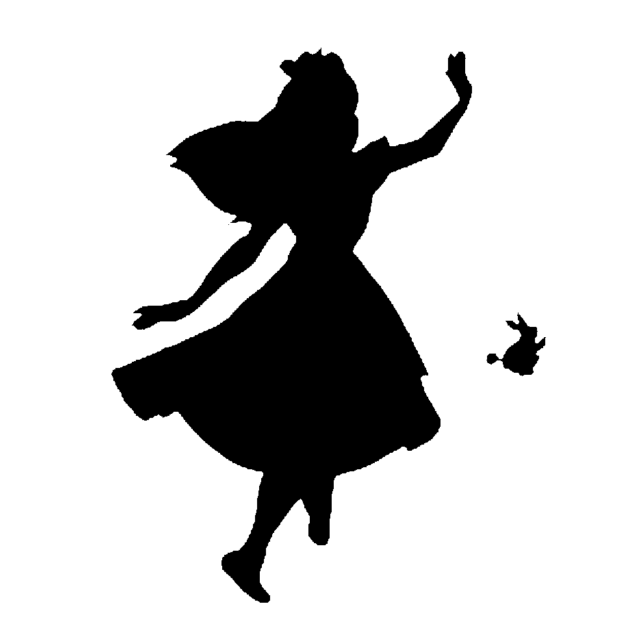

In [91]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 텍스트파일 열기
text = open('/Users/t2023-m0072/Desktop/ml_team_task/challenge/negative.txt').read()
# 마스크 이미지 가져오기
alice_mask = np.array(Image.open('/Users/t2023-m0072/Desktop/images/alice_mask.png'))

# 불용어 지정
stopwords = set(STOPWORDS)
stopwords.update(['netflix', 'movie', 'movies', 'show', 'shows', 'watch', 'account', 'time', 'app', 'series', 'phone', 'good','use','now','cant','dont','even'])

# 이미지 확인
plt.figure(figsize = (8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

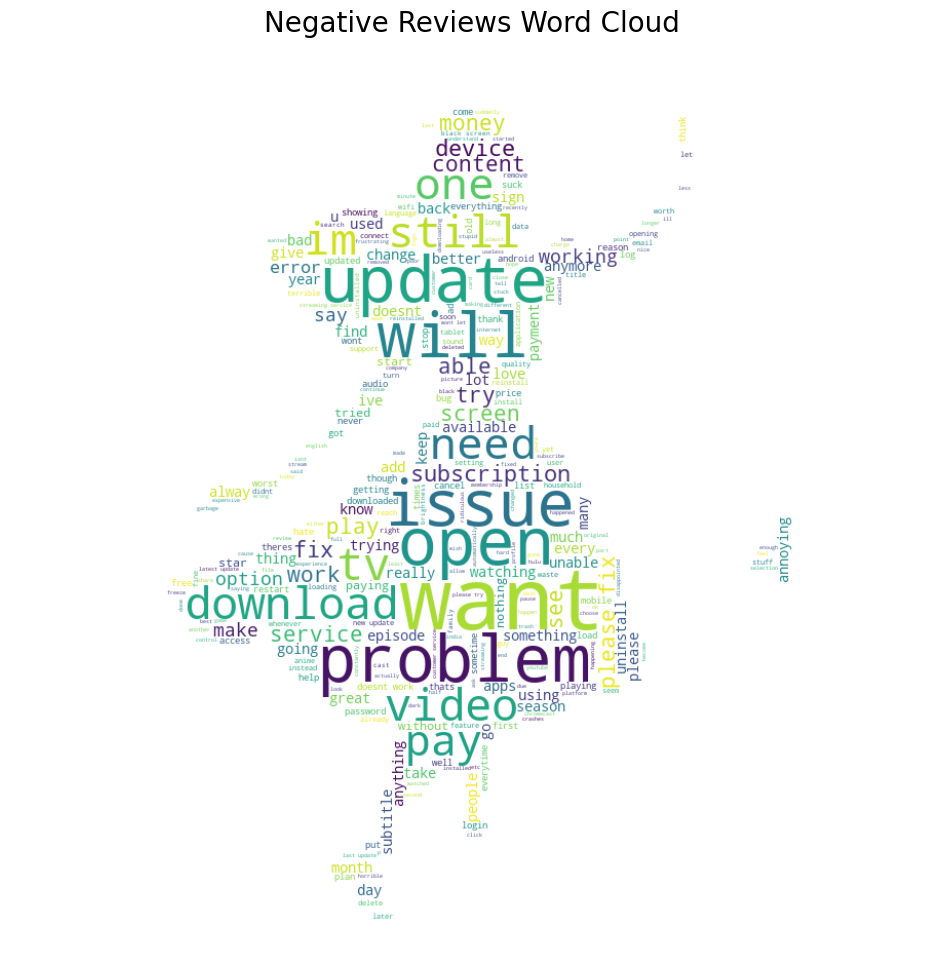

In [93]:
# 단어들 설정과 빈도분석
wc = WordCloud(background_color = 'white', max_words = 500, mask = alice_mask, stopwords=stopwords)
wc = wc.generate(text)                 

# 워드클라우드생성
plt.figure(figsize=(12, 12))
plt.imshow(wc, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud', size=20)
plt.axis('off')
plt.show()

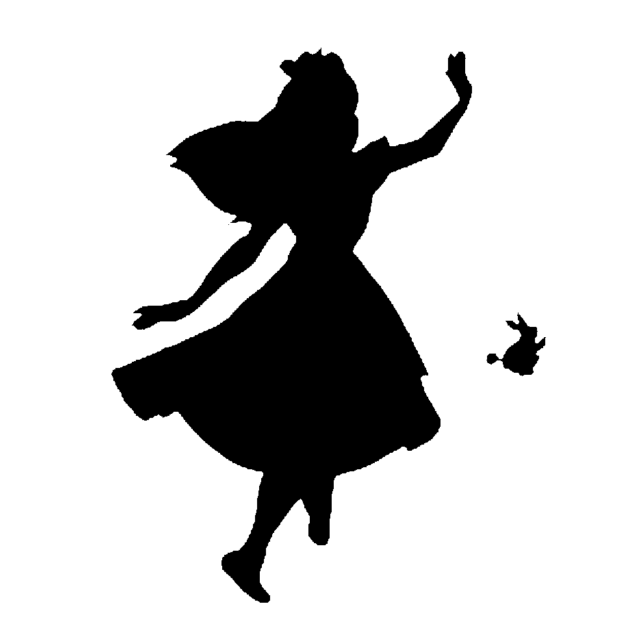

In [94]:
# 텍스트파일 열기
text1 = open('/Users/t2023-m0072/Desktop/ml_team_task/challenge/positive.txt').read()
# 마스크 이미지 가져오기
alice_mask = np.array(Image.open('/Users/t2023-m0072/Desktop/images/alice_mask.png'))

# 불용어 지정
stopwords = set(STOPWORDS)
stopwords.update(['netflix', 'movie', 'movies', 'show', 'shows', 'watch', 'account', 'time', 'app', 'series', 'phone','use','now','problem','cant','dont','even'])

# 이미지 확인
plt.figure(figsize = (8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# 단어들 설정과 빈도분석
wc = WordCloud(background_color = 'white', max_words = 500, mask = alice_mask, stopwords=stopwords)
wc = wc.generate(text)                  

# 워드클라우드생성
plt.figure(figsize=(12, 12))
plt.imshow(wc, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud', size=20)
plt.axis('off')
plt.show()